In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [18]:
d=pd.read_csv("Dhaka Rent.csv" )
d.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [19]:
d.shape #row and column

(60, 2)

In [20]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [21]:
d.head(3)#upor theke

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050


In [22]:
d.tail()#nich theke

,area,rent
55,3100,54000
56,2750,48500
57,1800,25100
58,2200,31560
59,3100,51600


In [23]:
 #missing value check
d.isnull().sum()

area    0
rent    0
dtype: int64

In [24]:
d['area'].head() # 1D style

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [42]:
d[['area']].head() # 2D style

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [25]:
d['rent'].head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

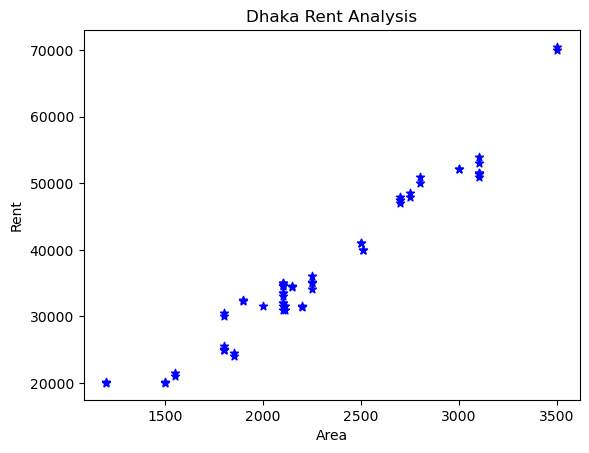

In [26]:
plt.scatter(d['area'],d['rent'],marker='*',color='blue')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Dhaka Rent Analysis')
plt.savefig('name.png')

In [27]:
basic_stat=d.describe()#descriptic statistics
basic_stat

,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


In [28]:
correlation=d.corr()
correlation

,area,rent
area,1.000000,0.974807
rent,0.974807,1.000000


<AxesSubplot:>

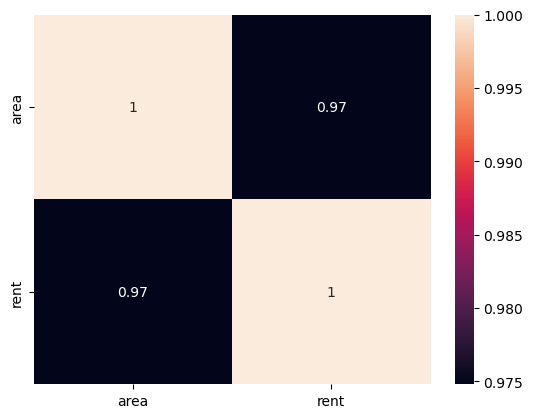

In [29]:
sns.heatmap(correlation,data=d, annot=True)

# Histogram For 'Area' and 'Rent'

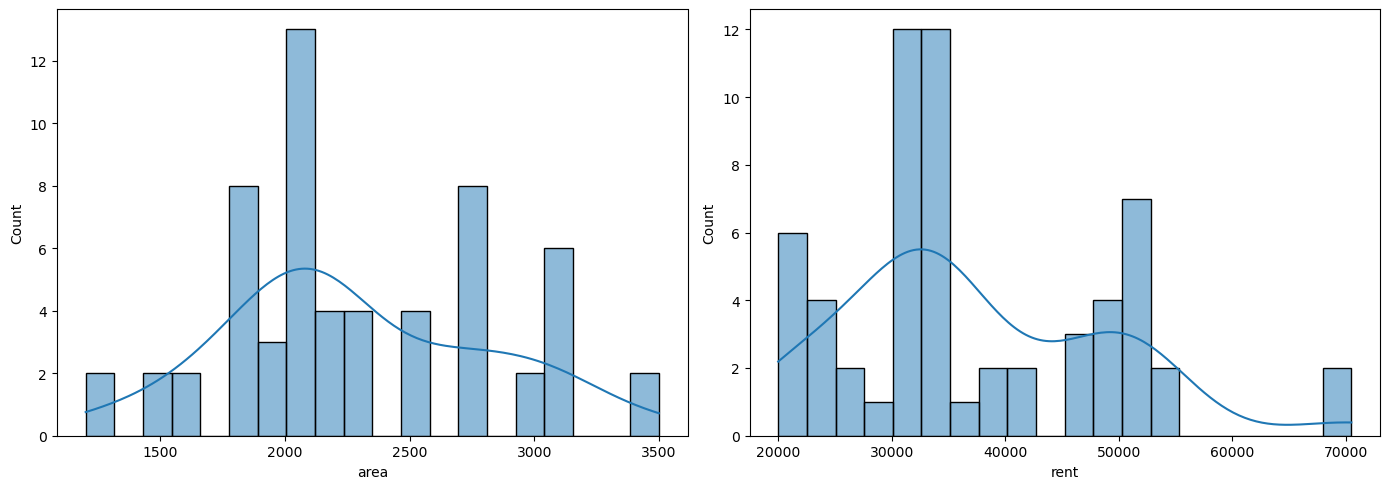

In [30]:
fix, ax=plt.subplots(1,2,figsize=(14,5))# aykhane 1,2 mane 1ta row 2 ta column
sns.histplot(d['area'], bins=20, kde='True', ax=ax[0])#kde true mane curve line ta dekhabe
sns.histplot(d['rent'], bins=20, kde='True', ax=ax[1])
plt.tight_layout()


# Boxplots for area and rent

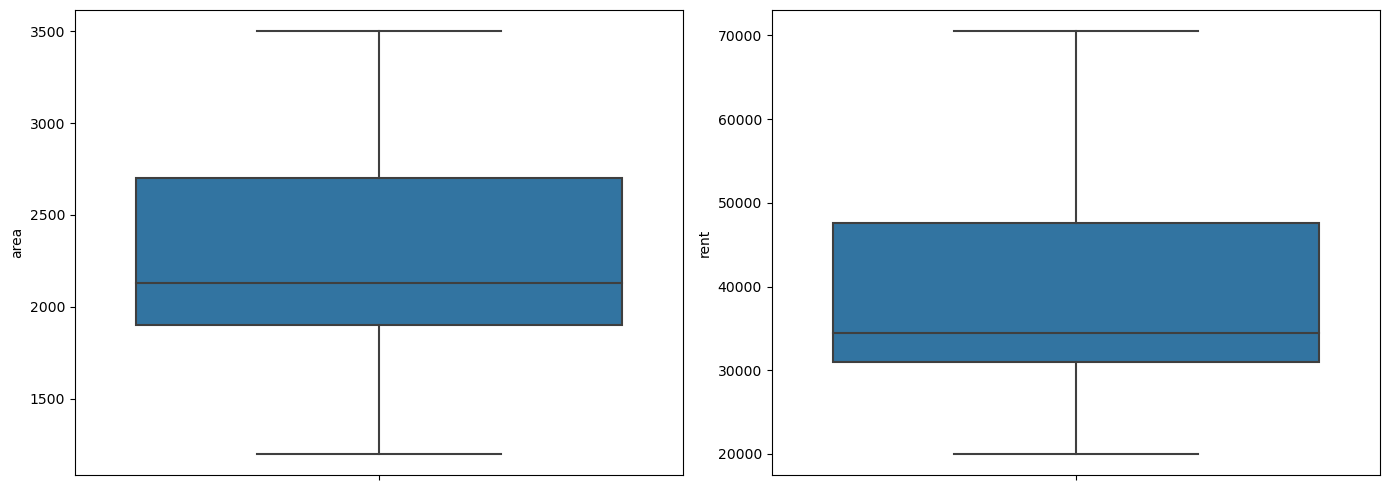

In [31]:
fig, bx=plt.subplots(1,2, figsize=(14,5))
sns.boxplot(y =d['area'], ax=bx[0])
sns.boxplot(y =d['rent'], ax=bx[1])
plt.tight_layout()

In [32]:
x=d['area']
y=d['rent']

# Linear Regression -Step-01

In [33]:
mean_x=np.mean(x)
mean_y=np.mean(y)

In [34]:
#calculate deviation
dev_x= x- mean_x
dev_y= y- mean_y


In [35]:
#calculate deviation
dev_x= x- mean_x
dev_y= y- mean_y

In [37]:
coef=np.sum(dev_x*dev_y)/np.sum(dev_x**2)
coef

21.292661473611954

In [38]:
intercept=mean_y-(coef*mean_x)
intercept

-11469.7354464311

In [40]:
#y = mx + c --aykhane m hocche coef x input dibo c intercept
pred_y=(coef*2000)+intercept
pred_y

31115.58750079281

In [41]:
# residual = original y- predicted y
31500 - 31115.58750079281

384.4124992071884

# OLS- Linear Regression With SKLEARN

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
reg=LinearRegression()

In [45]:
reg.fit(d[['area']], y) #traininig data x always 2d

LinearRegression()

In [46]:
reg.coef_

array([21.29266147])

In [47]:
reg.intercept_

-11469.735446431114

In [52]:
reg.predict([[2000]])

E:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([31115.58750079])

In [53]:
d.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [55]:
d['predicted_rent']=reg.predict(d[['area']])

In [56]:
d.head()

,area,rent,predicted_rent
0,2000,31500,31115.587501
1,2100,35000,33244.853648
2,2500,41050,41761.918238
3,2250,36100,36438.752869
4,3000,52100,52408.248974


In [59]:
d['residuals']=d['rent']-d['predicted_rent']

In [60]:
d.head()

,area,rent,predicted_rent,residuals
0,2000,31500,31115.587501,384.412499
1,2100,35000,33244.853648,1755.146352
2,2500,41050,41761.918238,-711.918238
3,2250,36100,36438.752869,-338.752869
4,3000,52100,52408.248974,-308.248974


# mse & mae

In [61]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [62]:
mse=mean_squared_error(d['rent'],d['predicted_rent']) #(actual,predicted)

In [63]:
mse

6778077.204095561

In [64]:
mae=mean_absolute_error(d['rent'],d['predicted_rent'])

In [65]:
mae

2009.8695093576282

In [66]:
#RMSE-ROot mean squre error
import math

In [67]:
math.sqrt(mse)

2603.474064417689

Text(0.5, 1.0, 'Dhaka Rent Analysis')

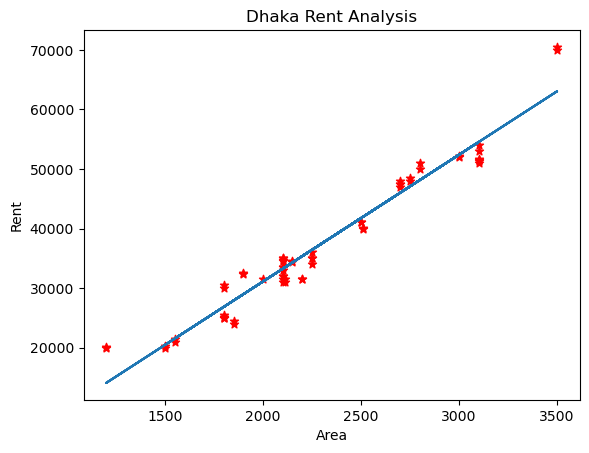

In [71]:
#BEST FIT LINE
#plt.plot(x,reg.predict(x))
plt.plot(x,d['predicted_rent'])
plt.scatter(d['area'],d['rent'],marker='*',color='red')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Dhaka Rent Analysis')

Text(0.5, 1.0, 'Dhaka Rent Analysis')

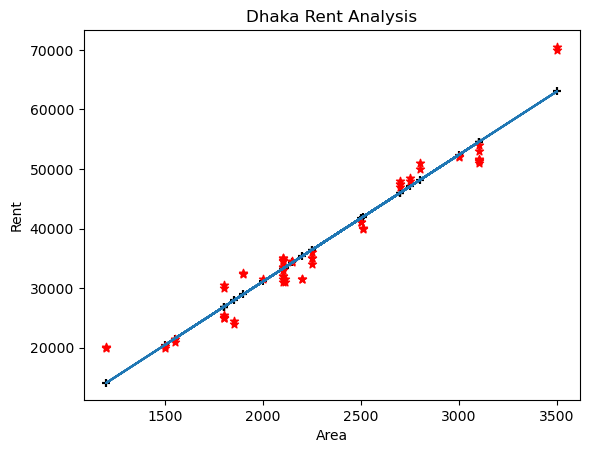

In [73]:
plt.plot(x,d['predicted_rent'])
plt.scatter(x,d['predicted_rent'],marker='+',color='black')

plt.scatter(d['area'],d['rent'],marker='*',color='red')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Dhaka Rent Analysis')

In [74]:
np.mean(x)

2289.0

In [75]:
np.mean(y)

37269.166666666664

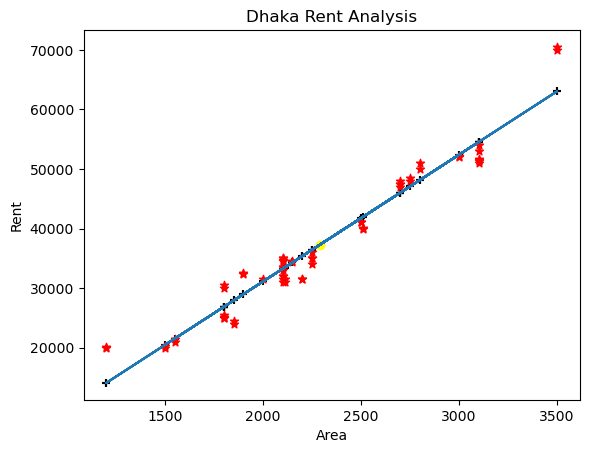

In [77]:
plt.plot(x,d['predicted_rent'])
plt.scatter(x,d['predicted_rent'],marker='+',color='black')

plt.scatter(d['area'],d['rent'],marker='*',color='red')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Dhaka Rent Analysis')
#mean
plt.scatter(np.mean(x),np.mean(y), marker='o',color='yellow')